# 01 Análisis exploratório (EDA)
Chequeo de los dados proporcionados por el orientador del trabajo.

In [1]:
import pandas as pd
from PIL import Image
import pickle
import os

In [2]:
business = pd.read_json(r'dataset/bluetab/business.json', lines=True)
business.head()

,business_id,categories
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
2,bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
3,eEOYSgkmpB90uNA7lDOMRA,"Vietnamese, Food, Restaurants, Food Trucks"
4,il_Ro8jwPlHresjw9EGmBg,"American (Traditional), Restaurants, Diners, B..."


In [3]:
photos_train = pd.read_json(r'dataset/bluetab/photos_train.json', lines=True)
photos_train.head()

,photo_id,business_id,caption,label
0,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
1,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
2,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
3,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
4,wZ29mUm6nKz566j17OBadw,jl38yx7zzMRbg-kOK8NLDw,,food


In [4]:
yelp = pd.read_json(r'dataset/photos.json', lines=True)
yelp.head()

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [5]:
merged_train = pd.merge(photos_train,
                  yelp,
                  how="inner",
                  on="photo_id",
                  suffixes=("_train", "_yelp"))
merged_train.head()

,photo_id,business_id_train,caption_train,label_train,business_id_yelp,caption_yelp,label_yelp
0,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside,yVZtL5MmrpiivyCIrVkGgA,,outside
1,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
2,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
3,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,Gzur0f0XMkrVxIwYJvOt2g,,food
4,wZ29mUm6nKz566j17OBadw,jl38yx7zzMRbg-kOK8NLDw,,food,jl38yx7zzMRbg-kOK8NLDw,,food


In [6]:
len(merged_train)

180094

In [7]:
photos_test = pd.read_json(r'dataset/bluetab/photos_test.json', lines=True)
photos_test.head()

,photo_id,business_id,caption,label
0,2dky5Vi4KBwJZL70YDKT8Q,EYs_T4NU2BbaUF7vUDI55Q,"Rainbow, California, and Snowy Mountain to go",food
1,Vm8lipLprfbEzjhSLW6igw,ow7hDGkfVJH65nniXH1a0g,,inside
2,XmaAjcvgWUpHpyEBt0_BvQ,ejT1iV5na58hFL6b9ECQ5Q,,food
3,cao6b_m8dwBEFQWG4_-xsQ,YDScTinCRYBu7Ox7BYHTkw,Chicken Caprese Entrée Salad,food
4,xuXT-NDsTNQr6hkqfKP6XA,1zXokDxm-BIbAIw9EuteiQ,Whether you are an overnight guest at the Holi...,inside


In [8]:
full = pd.concat([photos_train, photos_test])

In [9]:
len(full)

200100

In [10]:
merged = pd.merge(full,
                  yelp,
                  how="inner",
                  on="photo_id",
                  suffixes=("_full", "_yelp"))
merged.head()

,photo_id,business_id_full,caption_full,label_full,business_id_yelp,caption_yelp,label_yelp
0,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside,yVZtL5MmrpiivyCIrVkGgA,,outside
1,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
2,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
3,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,Gzur0f0XMkrVxIwYJvOt2g,,food
4,wZ29mUm6nKz566j17OBadw,jl38yx7zzMRbg-kOK8NLDw,,food,jl38yx7zzMRbg-kOK8NLDw,,food


In [11]:
len(full)

200100

In [12]:
!pwd

/Projetos_dev/projetos/proyecto_final_CNN


In [13]:
yelp_business = pd.read_json(r'dataset/yelp_academic_dataset_business.json', lines=True)
yelp.head()

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [14]:
photo_id = merged.iloc[0].photo_id
photo_id

'HCUdRJHHm_e0OCTlZetGLg'

In [15]:
yelp_photo = Image.open('dataset/photos/' + photo_id + '.jpg')

In [16]:
bluetab_photo = Image.open('dataset/bluetab/imagenes_negocios/' + photo_id + '.jpg')

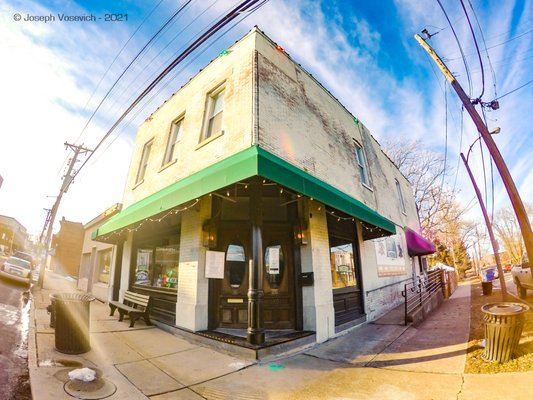

In [17]:
yelp_photo

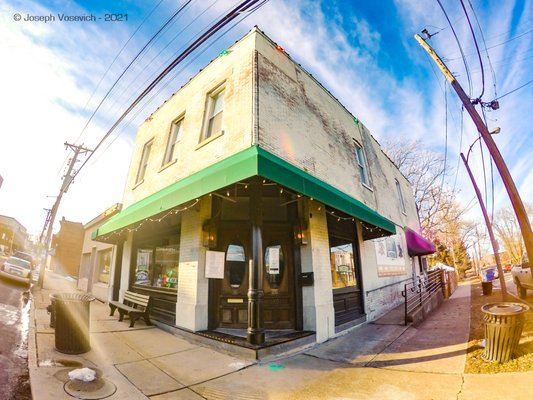

In [18]:
bluetab_photo

**Conclusión:** es el dataset de Yelp, pero troceado en train y test.

## Confirmar si el dataset de Bluetab está limpio

In [19]:
df2 = pickle.load(open('checkpoints/df2.pkl', 'rb'))
df2.head()

,photo_id,x_dim,y_dim,z_channels,pixels,corrupt
0,zsvj7vloL4L5jhYyPIuVwg,400.0,225.0,3.0,90000.0,False
1,HCUdRJHHm_e0OCTlZetGLg,400.0,533.0,3.0,213200.0,False
2,vkr8T0scuJmGVvN2HJelEA,400.0,600.0,3.0,240000.0,False
3,pve7D6NUrafHW3EAORubyw,400.0,600.0,3.0,240000.0,False
4,H52Er-uBg6rNrHcReWTD2w,400.0,600.0,3.0,240000.0,False


In [20]:
status = df2.merge(photos_train,
                   on='photo_id',
                   how="inner"
                  )

In [21]:
status.corrupt.value_counts()

False    180001
True         93
Name: corrupt, dtype: int64

In [22]:
foto_corrupta = status.loc[status.corrupt == True].iloc[0,0]
foto_corrupta

'JGpfPj8VEvnq1B-Xqr3w-A'

Vamos ver si hay fotos corruptas en train o test

In [23]:
try:
    Image.open('dataset/bluetab/imagenes_negocios/' + foto_corrupta + '.jpg')
except:
    print('No se puede abrir el fichero')

No se puede abrir el fichero


**Conclusión:** el dataset de Bluetab no está limpio.

## Balanceo

In [24]:
import matplotlib.pyplot as plt

In [25]:
train_dist = photos_train.label.value_counts()

In [26]:
test_dist = photos_test.label.value_counts()

In [27]:
dist = pd.merge(train_dist,
                  test_dist,
                  how="inner",
                  left_index=True, right_index=True,
                  suffixes=("_train", "_test"))
dist.head()

,label_train,label_test
food,97337,10815
inside,50428,5603
outside,16712,1857
drink,14103,1567
menu,1510,168


In [28]:
dist.apply(lambda x : x.label_train / x.label_test, axis=1)

food       9.000185
inside     9.000178
outside    8.999461
drink      9.000000
menu       8.988095
dtype: float64

**Conclusiones:**
- Dentro de cada sliver (train/test) las categorías no están balanceadas
- Las categorías existen en la misma proporción en los dos slivers

## Distribución de categorías de los negocios

In [29]:
yelp_business = pd.read_json(r'dataset/yelp_academic_dataset_business.json', lines=True)
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [30]:
business.columns

Index(['business_id', 'categories'], dtype='object')

In [31]:
business.categories.head()

0    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
2    Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
3           Vietnamese, Food, Restaurants, Food Trucks
4    American (Traditional), Restaurants, Diners, B...
Name: categories, dtype: object

In [32]:
categories = business.categories.apply(lambda x : x.split(', '))
categories.head()

0    [Restaurants, Food, Bubble Tea, Coffee & Tea, ...
1    [Burgers, Fast Food, Sandwiches, Food, Ice Cre...
2    [Ice Cream & Frozen Yogurt, Fast Food, Burgers...
3         [Vietnamese, Food, Restaurants, Food Trucks]
4    [American (Traditional), Restaurants, Diners, ...
Name: categories, dtype: object

In [33]:
df_categories = pd.DataFrame(categories)
df_categories.head()

,categories
0,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ..."
1,"[Burgers, Fast Food, Sandwiches, Food, Ice Cre..."
2,"[Ice Cream & Frozen Yogurt, Fast Food, Burgers..."
3,"[Vietnamese, Food, Restaurants, Food Trucks]"
4,"[American (Traditional), Restaurants, Diners, ..."


In [34]:
df_categories['number'] = df_categories.apply(len, axis=1)

In [35]:
df_categories.head()

,categories,number
0,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...",1
1,"[Burgers, Fast Food, Sandwiches, Food, Ice Cre...",1
2,"[Ice Cream & Frozen Yogurt, Fast Food, Burgers...",1
3,"[Vietnamese, Food, Restaurants, Food Trucks]",1
4,"[American (Traditional), Restaurants, Diners, ...",1


In [36]:
df_categories.max()

categories    [Zoos, Active Life, Food, Farmers Market]
number                                                1
dtype: object

In [37]:
print('Hay negocios que llegan a tener {} categorías'.format(df_categories.apply(lambda x : len(x.categories), axis=1).max()))

Hay negocios que llegan a tener 36 categorías


In [38]:
res_list = [y for x in categories.to_list() for y in x]
res_list

['Restaurants',
 'Food',
 'Bubble Tea',
 'Coffee & Tea',
 'Bakeries',
 'Burgers',
 'Fast Food',
 'Sandwiches',
 'Food',
 'Ice Cream & Frozen Yogurt',
 'Restaurants',
 'Ice Cream & Frozen Yogurt',
 'Fast Food',
 'Burgers',
 'Restaurants',
 'Food',
 'Vietnamese',
 'Food',
 'Restaurants',
 'Food Trucks',
 'American (Traditional)',
 'Restaurants',
 'Diners',
 'Breakfast & Brunch',
 'Food',
 'Delis',
 'Italian',
 'Bakeries',
 'Restaurants',
 'Sushi Bars',
 'Restaurants',
 'Japanese',
 'Korean',
 'Restaurants',
 'Coffee & Tea',
 'Food',
 'Cafes',
 'Bars',
 'Wine Bars',
 'Restaurants',
 'Nightlife',
 'Restaurants',
 'Italian',
 'Restaurants',
 'Japanese',
 'Seafood',
 'Cocktail Bars',
 'Bars',
 'Italian',
 'Nightlife',
 'Restaurants',
 'Eatertainment',
 'Arts & Entertainment',
 'Brewpubs',
 'American (Traditional)',
 'Bakeries',
 'Breweries',
 'Food',
 'Restaurants',
 'Restaurants',
 'Burgers',
 'Restaurants',
 'Specialty Food',
 'Steakhouses',
 'Food',
 'Italian',
 'Pizza',
 'Pasta Shops',
 

In [39]:
# categorías (sin duplicados)
lista_categorias = list(set(res_list))
lista_categorias

['Singaporean',
 'Sardinian',
 'Party Supplies',
 'Caterers',
 'Moroccan',
 'Boat Charters',
 'Transportation',
 'Souvenir Shops',
 'Elementary Schools',
 'Video/Film Production',
 'Skate Parks',
 'Rest Stops',
 'Persian/Iranian',
 'New Mexican Cuisine',
 'Canadian (New)',
 'Outdoor Movies',
 'Musicians',
 'Golf',
 'Hair Removal',
 'Financial Advising',
 'Striptease Dancers',
 'Photography Stores & Services',
 'Arabic',
 'Radio Stations',
 'Honey',
 'Dog Parks',
 'Pan Asian',
 'Electronics',
 'Christmas Trees',
 'Breweries',
 'Cooking Schools',
 'Golf Equipment',
 'Art Schools',
 'Food Delivery Services',
 'Botanical Gardens',
 'Race Tracks',
 'Opera & Ballet',
 'Izakaya',
 'Beer Tours',
 'Guamanian',
 'Jewelry Repair',
 'Speakeasies',
 'LAN Centers',
 'Sports Clubs',
 'Shanghainese',
 'Food',
 'Himalayan/Nepalese',
 "Men's Clothing",
 'Meaderies',
 'Vintage & Consignment',
 'Patisserie/Cake Shop',
 'Pet Stores',
 'Day Camps',
 'Airports',
 'Pet Photography',
 'Dry Cleaning',
 'Shoppin

In [40]:
print('Hay {} categorías'.format(len(lista_categorias)))

Hay 666 categorías


Vamos exportar el listado de categorías

In [41]:
checkpoints_location = 'checkpoints'
if (os.path.exists(checkpoints_location) or os.path.isdir(checkpoints_location)):
    print('Carpeta de checkpoints ya existe')
else:
    os.mkdir(checkpoints_location)
    print('Carpeta de checkpoints creadax')

Carpeta de checkpoints ya existe


In [42]:
df_lista_categorias = pd.DataFrame(lista_categorias, columns=['category']) 
df_lista_categorias.head()

,category
0,Singaporean
1,Sardinian
2,Party Supplies
3,Caterers
4,Moroccan


In [43]:
# guardar en CSV 
df_lista_categorias.to_csv(checkpoints_location+'/categorias.csv', index=False)

In [44]:
res_list.count('Burgers')

3120

In [45]:
df_lista_categorias['frecuencia'] = df_lista_categorias.apply(lambda x : res_list.count(x.category),
                                                              axis=1)
df_lista_categorias.head()

,category,frecuencia
0,Singaporean,7
1,Sardinian,3
2,Party Supplies,18
3,Caterers,1538
4,Moroccan,32


In [46]:
df_lista_categorias.sort_values(by='frecuencia', ascending=False, inplace=True)

In [47]:
df_lista_categorias = df_lista_categorias.reset_index(drop=True)
df_lista_categorias

,category,frecuencia
0,Restaurants,29374
1,Food,15297
2,Nightlife,8103
3,Bars,7555
4,American (Traditional),5473
...,...,...
661,Counseling & Mental Health,1
662,Family Practice,1
663,Building Supplies,1
664,Audio/Visual Equipment Rental,1


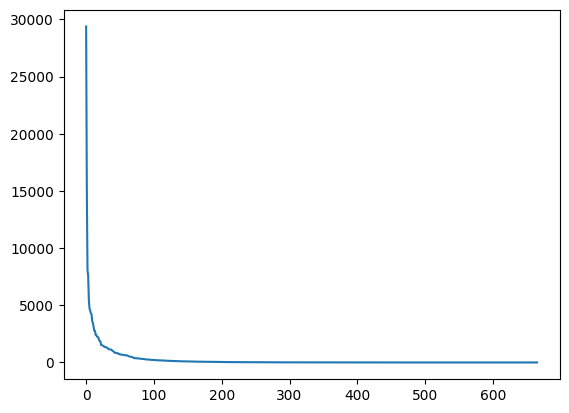

In [48]:
plt.plot(df_lista_categorias.frecuencia);

**Conclusión:** la mayoría de las categorías son poco usadas